In [1]:
%matplotlib inline

import pyscisci.all as pyscisci

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [2]:
# set this path to where the new Custom DataBase is stored
path2cdb = '/home/ajgates/myCustomDB'
path2cdb = '/users/hgt6rn/Documents/DataSets/myCustomDB'

In [3]:
mycdb = pyscisci.CustomDB(path2cdb, database_extension='hdf', show_progress=True) 
# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one database in memory at a time
# otherwise keep_in_memory=True will keep each database in memory after its loaded


# The Custom DB requires that the preprocessing be run on initialization to check for available data.

In [4]:
# The Custom DB module looks for and validates the following dataframes:

# pub  - keeps all of the publication information
# columns : ['PublicationId', 'Year', 'JournalId', 'FamilyId',  'Doi', 'Title', 'Date', 'Volume', 'Issue', 'DocType']

# author  - keeps all of the author information (only some versions of WoS ship with the AuthorId known as the AuthorDAIS)
# columns : ['AuthorId', 'FullName', 'LastName', 'FirstName', 'MiddleName']

# pub2ref  - links publications to their references or citations
# columns : ['CitingPublicationId', 'CitedPublicationId']

# paa  - links publications, authors, and affiliations (only some versions of WoS ship with the AuthorId known as the AuthorDAIS)
# columns : ['PublicationId', 'AuthorId', 'AffiliationId', 'AuthorSequence',  'OrigAuthorName', 'OrigAffiliationName']

# author2pub  - links the authors to their publications
# columns : ['PublicationId', 'AuthorId', 'AuthorOrder']

# field  - field information
# columns : ['FieldId', 'FieldLevel', 'NumberPublications', 'FieldName']

# pub2field  - links publications to their fields
# columns : ['PublicationId', 'FieldId']

# affiliation  - affiliation information
# columns : ['AffiliationId', 'NumberPublications', 'NumberCitations', 'FullName', 'GridId', 'OfficialPage', 'WikiPage', 'Latitude', 'Longitude']

# journal  - journal information
# columns : ['JournalId', 'FullName', 'Issn', 'Publisher', 'Webpage']


# after additional processing, these DataFrames become available

# pub2refnoself  - links publications to their references or citations with self-citations removed
# columns : ['CitingPublicationId', 'CitedPublicationId']

# impact  - precomputed citation counts, columns will depend on which counts are computed
# columns : ['PublicationId', 'Year', ....]

Loading Publications:   0%|          | 0/1 [00:00<?, ?it/s]

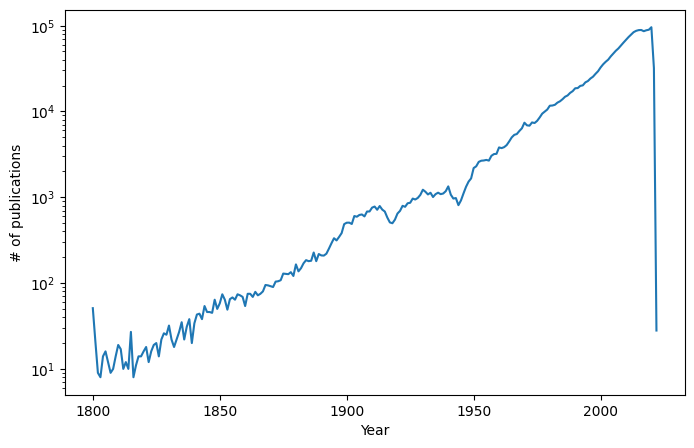

In [4]:
# lets plot the number of publications each year
pub  = mycdb.pub 

yearly_articles = pyscisci.groupby_count(df=pub , colgroupby='Year', colcountby='PublicationId', count_unique=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'],yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

Loading Publication Author Affiliation:   0%|          | 0/1 [00:00<?, ?it/s]

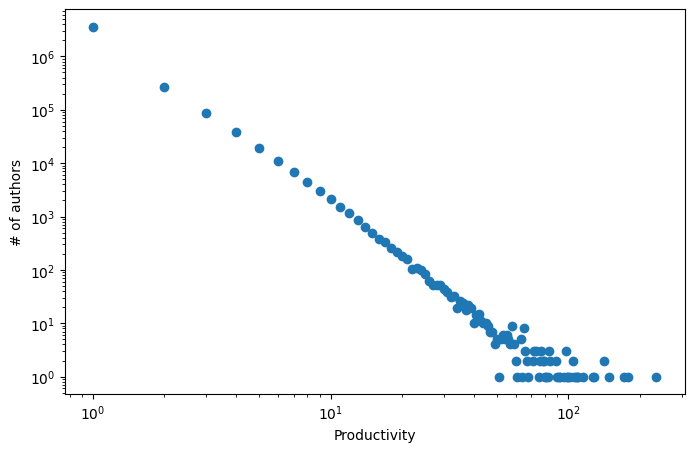

In [6]:
# now we can see the distribution of author productivity 
pa  = mycdb.author2pub  # publication author relationships

author_prod = pyscisci.author_productivity(pa , colgroupby = 'AuthorId', colcountby = 'PublicationId')

prodvalues, prodcounts = np.unique(author_prod['Productivity'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(prodvalues, prodcounts)

ax.set_xlabel('Productivity')
ax.set_ylabel("# of authors")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()